# Abstract

This analysis demonstrates the use of three popular clustering algorithms—K-Means, Hierarchical Clustering, and DBSCAN—on a customer dataset containing demographic and behavioral features. The dataset includes variables such as gender, age, annual income, and spending score. The goal is to uncover patterns in customer behavior and group similar customers into clusters based on these features.

### 1. **Data Preprocessing**:
   - **Categorical Encoding**: The "Gender" feature is encoded using `LabelEncoder` to transform categorical values (Male/Female) into numeric values (0/1).
   - **Standardization**: The features are standardized using `StandardScaler` to bring them to a common scale, ensuring that variables like income and age do not dominate the clustering process.

### 2. **K-Means Clustering**:
   - **Optimal Clusters Selection**: The "Elbow Method" is used to identify the optimal number of clusters, with an observed knee at 5 clusters. 
   - **Cluster Formation**: The K-Means algorithm is run with 5 clusters using `n_init=12` and `max_iter=1000`. Each data point is assigned a label based on the cluster it belongs to.
   - **Insights**: The clusters identified represent different customer groups, such as those with high annual income and low spending scores, medium annual income and medium spending scores, and high income with high spending scores, among others.
   
### 3. **Hierarchical Clustering**:
   - **Agglomerative Clustering**: The `AgglomerativeClustering` algorithm is applied with 5 clusters. The linkage method used is "Ward", which minimizes variance within clusters.
   - **Cluster Visualization**: Scatter plots are created to visualize how customers are grouped based on age, spending score, and income, showing distinct clusters formed by the hierarchical approach.
   - **Insights**: The hierarchical clustering provides a different view of the customer segments, revealing the structure of relationships between clusters without needing to specify the number of clusters upfront.

### 4. **DBSCAN Clustering**:
   - **Density-Based Clustering**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is applied with `eps=12.5` and `min_samples=4`. This algorithm identifies clusters based on density and can detect noise (outliers).
   - **Cluster Results**: The DBSCAN algorithm labels 25 points as outliers (denoted by `-1`), while the remaining customers are assigned to different clusters.
   - **Insights**: DBSCAN's ability to identify outliers is valuable for distinguishing customers who deviate significantly from the rest in terms of spending behavior or income.

### 5. **Visualization**:
   - **Scatter Plots**: Multiple scatter plots are created to visualize the clusters generated by each algorithm. For instance, `Annual Income vs Spending Score` and `Age vs Spending Score` are used to display the separation of customer segments in 2D space.
   - **Cluster Comparisons**: The scatter plots provide an intuitive understanding of how each algorithm groups the customers, highlighting differences between K-Means, hierarchical clustering, and DBSCAN in terms of cluster shapes and outliers.

By applying these clustering techniques, the analysis provides insights into customer segments, helping businesses tailor their strategies for each group.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [68]:
cust_df = pd.read_csv("Clustering_Cust.csv")
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
nan_sum_per_column = cust_df.isna().sum()
print(nan_sum_per_column)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [70]:
print(cust_df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [71]:
print(cust_df.shape)

(200, 5)


In [72]:
print(cust_df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [73]:
X = cust_df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].values
X[0:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

# Preprocessing

In [74]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Female','Male'])
X[:,0] = le_gender.transform(X[:,0]) 

X[0:5]


array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40]], dtype=object)

# Normalizing over the standard deviation

In [75]:
from sklearn.preprocessing import StandardScaler

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# MODELING

## Kmeans

### Elbow - criterion

D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows wi

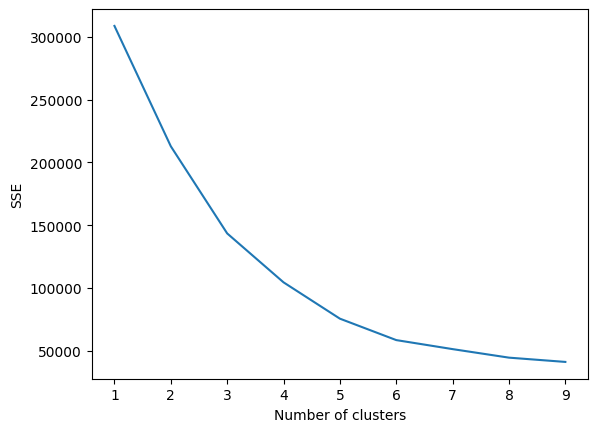

In [76]:
# Column names
column_names = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create DataFrame
df2 = pd.DataFrame(X, columns=column_names)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(df2)
    df2['clusters'] = kmeans.labels_  # Assign labels to a column in df
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

So we can see that the optimum value for K can be 5

In [77]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Insights
We assign the labels to each row in dataframe.

In [78]:
# Column names
column_names = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create DataFrame
data = pd.DataFrame(X, columns=column_names)
data["Clus_km"] = labels
data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


In [79]:
data.groupby('Clus_km').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,0.417722,43.088608,55.291139,49.56962
1,0.461538,32.692308,86.538462,82.128205
2,0.391304,25.521739,26.304348,78.565217
3,0.527778,40.666667,87.75,17.583333
4,0.391304,45.217391,26.304348,20.913043


In [80]:
k_means_labels = k_means.labels_
k_means_labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

## Visualization of clusters

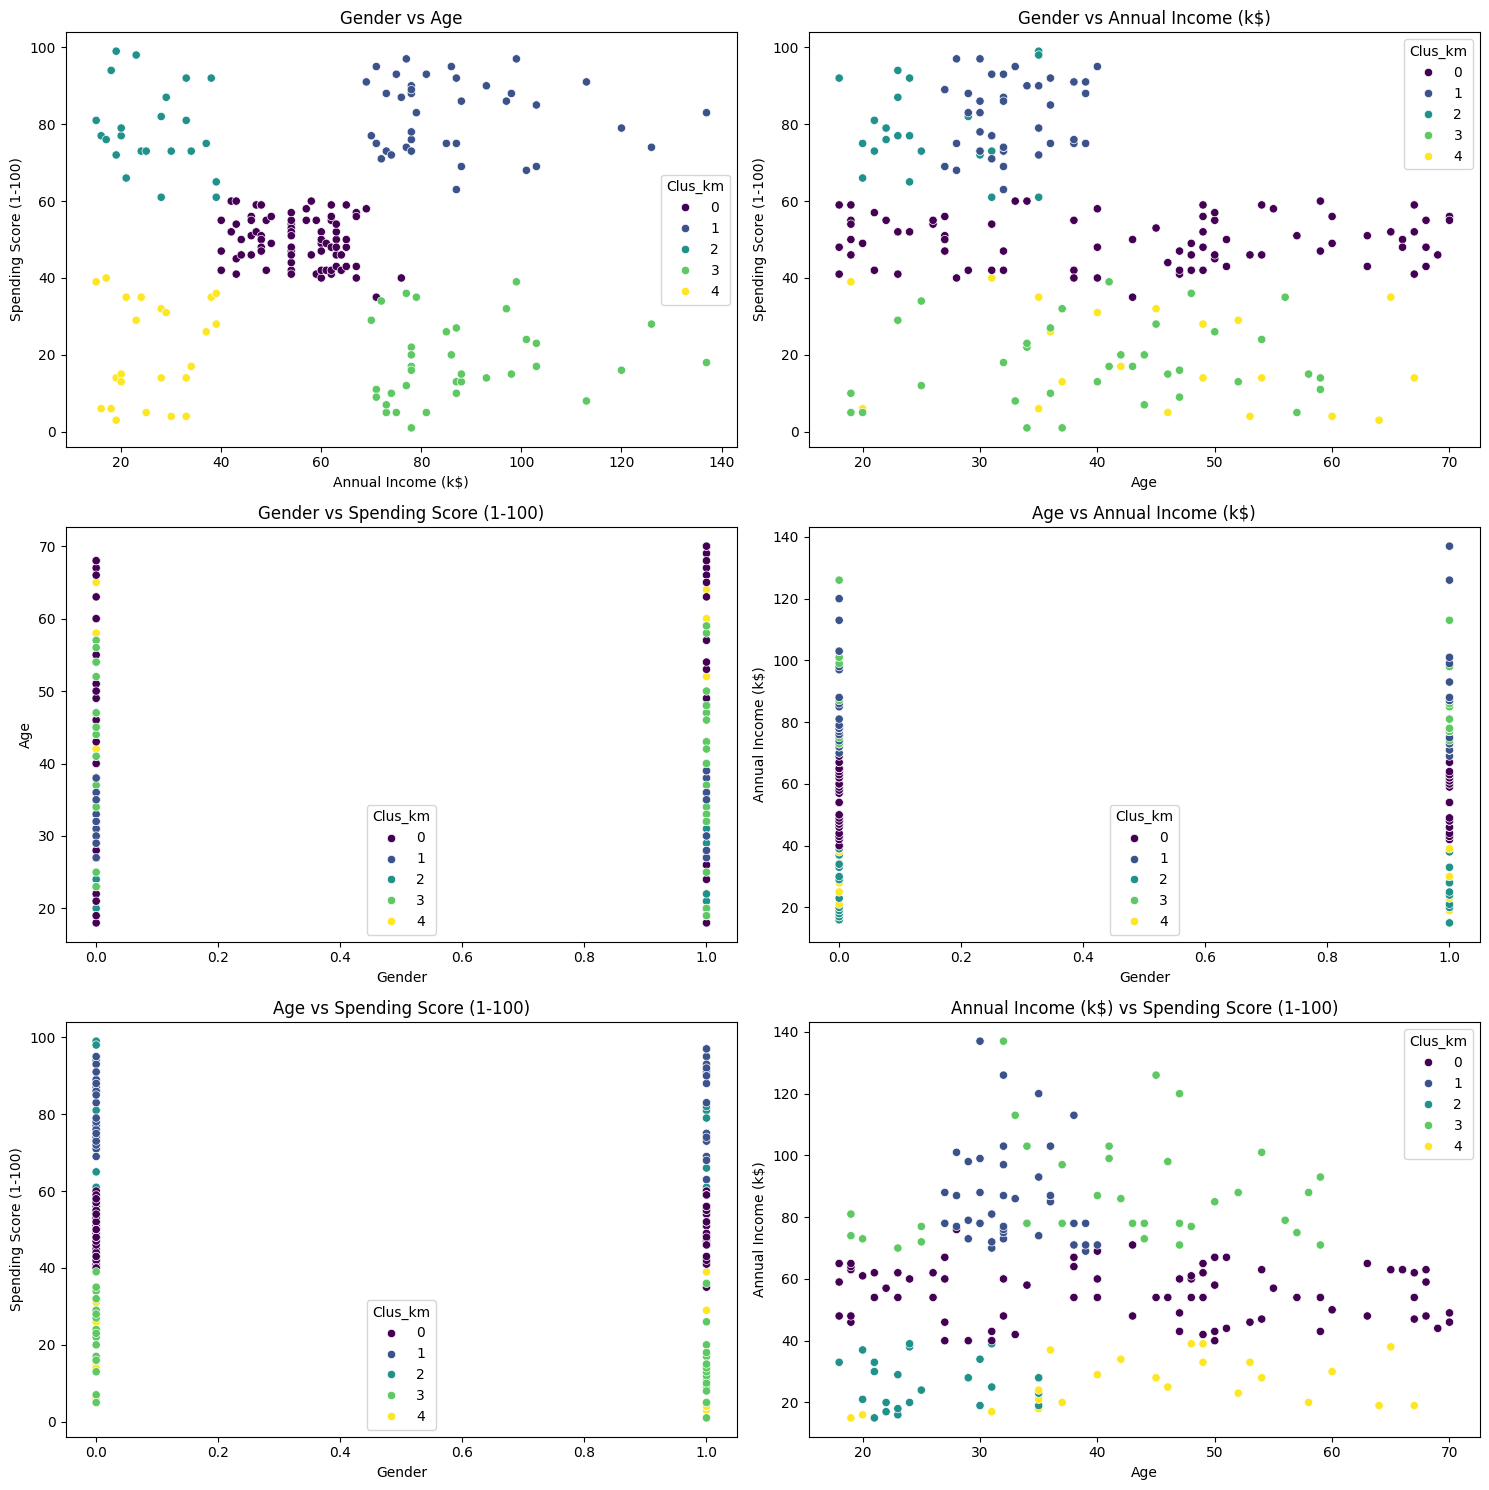

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot Annual Income vs Spending Score
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Clus_km', palette='viridis', ax=axes[0, 0])
axes[2, 1].set_title('Annual Income (k$) vs Spending Score (1-100)')

# Plot Age vs Spending Score
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Clus_km', palette='viridis', ax=axes[0, 1])
axes[2, 0].set_title('Age vs Spending Score (1-100)')

# Plot Gender vs Age
sns.scatterplot(data=data, x='Gender', y='Age', hue='Clus_km', palette='viridis', ax=axes[1, 0])
axes[0, 0].set_title('Gender vs Age')

# Plot Gender vs Annual Income
sns.scatterplot(data=data, x='Gender', y='Annual Income (k$)', hue='Clus_km', palette='viridis', ax=axes[1, 1])
axes[0, 1].set_title('Gender vs Annual Income (k$)')

# Plot Gender vs Spending Score
sns.scatterplot(data=data, x='Gender', y='Spending Score (1-100)', hue='Clus_km', palette='viridis', ax=axes[2, 0])
axes[1, 0].set_title('Gender vs Spending Score (1-100)')

# Plot Age vs Annual Income
sns.scatterplot(data=data, x='Age', y='Annual Income (k$)', hue='Clus_km', palette='viridis', ax=axes[2, 1])
axes[1, 1].set_title('Age vs Annual Income (k$)')




# Adjust layout
plt.tight_layout()
plt.show()


K-Means algorithm generated the following 5 clusters:

-  clients with **high annual income** and **low spending score**  
-  clients with **medium annual income** and **medium spending score**  
- clients with **high annual income** and **high spending score**  
- clients with **low annual income** and **low spending score**  
- clients with **low annual income** and **high spending score** 

final clusters based on Kmeans

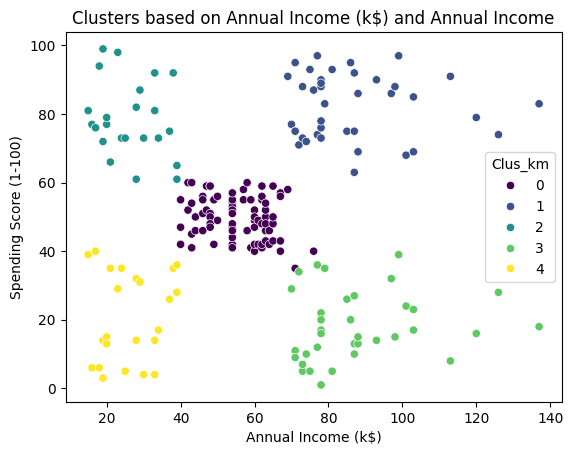

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Assuming 'Clus_km' column contains cluster labels assigned by KMeans

# Plotting the clusters
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Clus_km', palette='viridis')
plt.title('Clusters based on Annual Income (k$) and Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


# Hierarchial Clustering

In [83]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [84]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc.fit(df2)
labels_hc = hc.labels_
hc_df = data.copy()
hc_df['labels'] = labels_hc

D:\anacon\envs\sep_2021\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


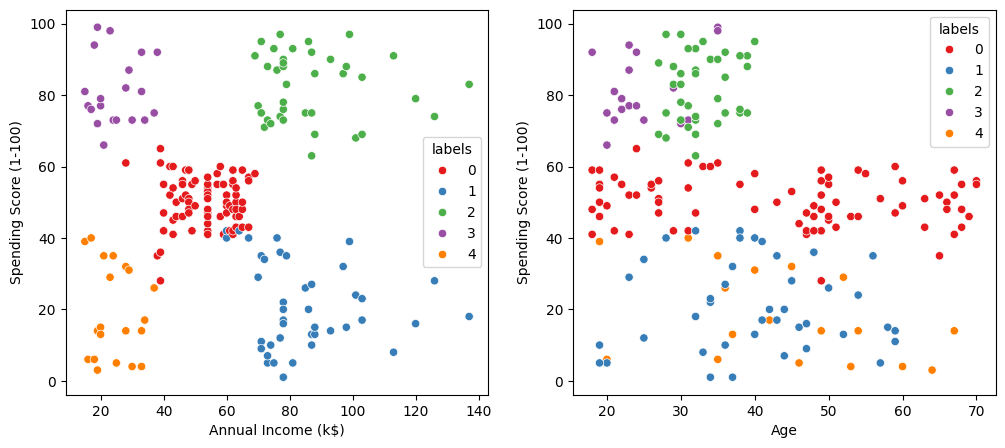

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined hc_df, labels_hc, and imported necessary libraries

fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=hc_df,
                hue='labels', ax=axes[0], palette='Set1', legend='full')

# Second subplot
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=hc_df,
                hue='labels', palette='Set1', ax=axes[1], legend='full')

plt.show()


## DBSCAN

In [86]:
from sklearn.cluster import DBSCAN

I tried different 'eps' and 'min_samples' to run DBSCAN. following is final clustring results with this approach:

In [87]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(df2)

DBSCAN_clustered = df2.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [88]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,25
0,109
1,8
2,34
3,20
4,4


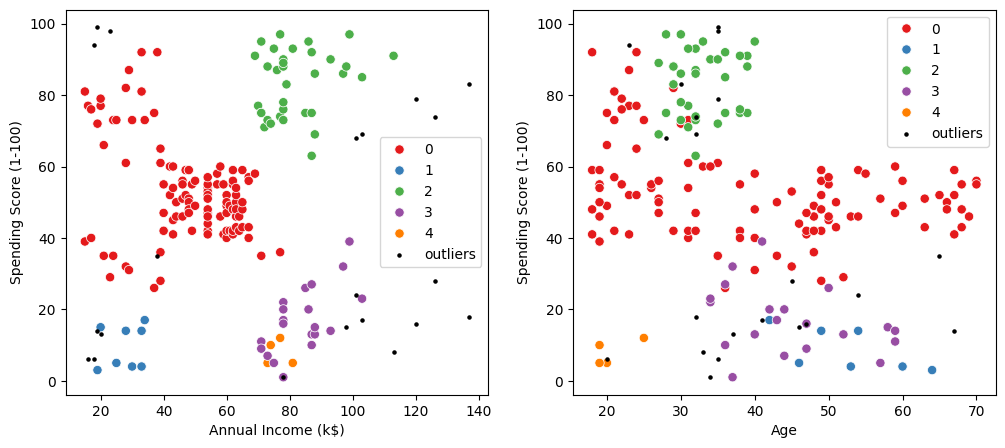

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined DBSCAN_clustered, outliers, and imported necessary libraries

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

# Second subplot
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

# Plot outliers
axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")

axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()
